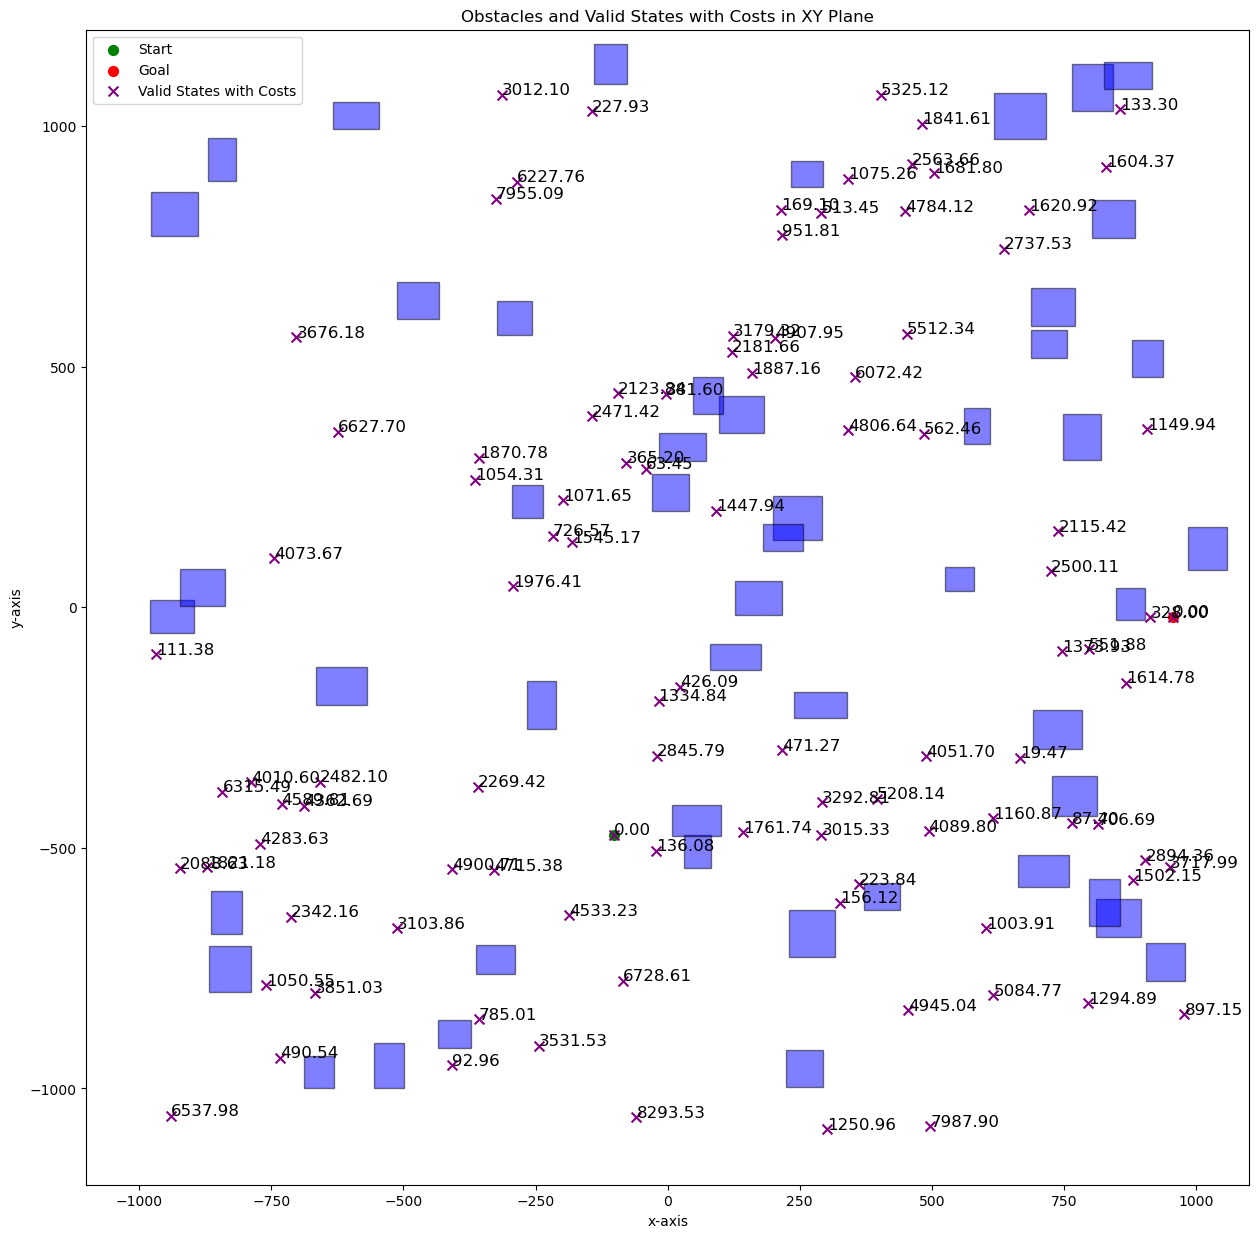

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

def is_valid_state(state, obstacles):
    for obstacle in obstacles:
        if (state.x > obstacle.x and state.x < obstacle.x + obstacle.dx) and (state.y > obstacle.y and state.y < obstacle.y + obstacle.dy):
            return False
    return True


class Obstacle:
    def __init__(self, x, y, z, dx, dy, dz):
        self.x = x
        self.y = y
        self.z = z
        self.dx = dx
        self.dy = dy
        self.dz = dz

class State:
    def __init__(self, x, y, goal_state, obstacles):
        self.x = x
        self.y = y
        self.xy_distance_to_goal = self.determine_xy_distance_to_goal(goal_state) if goal_state is not None else 0
        self.xy_distance_to_nearest_obstacle = self.determine_xy_distance_to_nearest_obstacle(obstacles) if obstacles is not None else 0
        self.ca = self.determine_ca()
        self.cr = self.determine_cr()
        self.cost = self.ca + self.cr

    def determine_xy_distance_to_goal(self, goal_state):
        return np.sqrt((self.x - goal_state.x)**2 + (self.y - goal_state.y)**2)

    def determine_xy_distance_to_nearest_obstacle(self, obstacles):
        return min(np.sqrt((self.x - obs.x)**2 + (self.y - obs.y)**2) for obs in obstacles)

    def determine_ca(self):
        
        if self.xy_distance_to_goal == 0:
            return 0
        return -0.1*self.xy_distance_to_goal

    def determine_cr(self):
        
        return 0.1*self.xy_distance_to_nearest_obstacle**2

# Generate a list of random obstacles
obstacles = []
for _ in range(50):
    x = random.uniform(-1000, 1000)
    y = random.uniform(-1100, 1100)
    z = random.uniform(-100, 100)
    dx = random.uniform(50, 100)
    dy = random.uniform(50, 100)
    dz = z
    obstacles.append(Obstacle(x, y, z, dx, dy, dz))


goal = State(0, 0, None, obstacles)
# Sample 100 states that don't collide with obstacles
valid_states = []

while len(valid_states) < 100:
    x = random.uniform(-1000, 1000)
    y = random.uniform(-1100, 1100)
    state = State(x, y, goal, obstacles)

    if is_valid_state(state, obstacles):
        valid_states.append(state)

start = valid_states[0]
goal = valid_states[-1]
start.cost = 0
goal.cost =0
# Plot the obstacles and valid states with costs
fig, ax = plt.subplots(figsize=(15, 15))

for obstacle in obstacles:
    rect = Rectangle((obstacle.x, obstacle.y), obstacle.dx, obstacle.dy, facecolor='blue', edgecolor='black', alpha=0.5)
    ax.add_patch(rect)

ax.scatter(start.x, start.y, c='green', marker='o', s=50, label='Start')
ax.scatter(goal.x, goal.y, c='red', marker='o', s=50, label='Goal')

# Plot the valid states with costs
valid_state_x = [state.x for state in valid_states]
valid_state_y = [state.y for state in valid_states]


cost_labels = [f"{state.cost:.2f}" for state in valid_states]
scatter_points = ax.scatter(valid_state_x, valid_state_y, c='purple', marker='x', s=50, label='Valid States with Costs')

# Annotate the costs for each valid state
for i, txt in enumerate(cost_labels):
    ax.annotate(txt, (valid_state_x[i], valid_state_y[i]), fontsize=12, color='black')

ax.set_xlim(-1100, 1100)
ax.set_ylim(-1200, 1200)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Obstacles and Valid States with Costs in XY Plane')
ax.legend()

plt.show()


In [ ]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random


class Obstacle:
    def __init__(self, x, y, z, dx, dy, dz):
        self.x = x
        self.y = y
        self.z = z
        self.dx = dx
        self.dy = dy
        self.dz = dz


class State:
    def __init__(self, x, y, goal_state, obstacles):
        self.x = x
        self.y = y
        self.xy_distance_to_goal = self.determine_xy_distance_to_goal(goal_state) if goal_state is not None else 0
        self.xy_distance_to_nearest_obstacle = self.determine_xy_distance_to_nearest_obstacle(obstacles) if obstacles is not None else 0
        self.ca = self.determine_ca()
        self.cr = self.determine_cr()
        self.cost = self.ca + self.cr

    def determine_xy_distance_to_goal(self, goal_state):
        return np.sqrt((self.x - goal_state.x)**2 + (self.y - goal_state.y)**2)

    def determine_xy_distance_to_nearest_obstacle(self, obstacles):
        return min(np.sqrt((self.x - obs.x)**2 + (self.y - obs.y)**2) for obs in obstacles)

    def determine_ca(self):
        if self.xy_distance_to_goal == 0:
            return 0
        return -0.1*self.xy_distance_to_goal

    def determine_cr(self):
        return 0.1*self.xy_distance_to_nearest_obstacle**2


class Graph:
    def __init__(self, valid_states, obstacles):
        self.valid_states = valid_states
        self.obstacles = obstacles

    def get_neighbors(self, state):
        neighbors = []
        for valid_state in self.valid_states:
            if valid_state == state:
                continue
            if is_valid_state(valid_state, self.obstacles) and not do_lines_intersect(state, valid_state, self.obstacles):
                neighbors.append(valid_state)
        return neighbors

    def get_cost(self, current, neighbor):
        return np.sqrt((current.x - neighbor.x)**2 + (current.y - neighbor.y)**2)

    def heuristic(self, current, goal):
        return np.sqrt((current.x - goal.x)**2 + (current.y - goal.y)**2)


def is_valid_state(state, obstacles):
    for obstacle in obstacles:
        if (state.x > obstacle.x and state.x < obstacle.x + obstacle.dx) and (state.y > obstacle.y and state.y < obstacle.y + obstacle.dy):
            return False
    return True


def do_lines_intersect(state1, state2, obstacles):
    for obstacle in obstacles:
        x1, y1, x2, y2 = state1.x, state1.y, state2.x, state2.y
        x3, y3, x4, y4 = obstacle.x, obstacle.y, obstacle.x + obstacle.dx, obstacle.y + obstacle.dy

        if (max(x1,x2) < min(x3,x4)) or (max(x3,x4) < min(x1,x2)) or (max(y1,y2) < min(y3,y4)) or (max(y3,y4) < min(y1,y2)):
            continue

        x1, y1, x2, y2 = x1 - obstacle.x, y1 - obstacle.y, x2 - obstacle.x, y2 - obstacle.y
        x3, y3,
